# Table of Contents
- [Introduction](#Introduction)
- [Data Cleansing](#Data-Cleansing)
- [Data Visualization](#Data-Visualization)
- [Model Training and Evaluation](#model-training-and-evaluation)

#Introduction

In this project, I analyzed housing prices across the United States. I cleansed and formatted the data, and plotted the houses on the map. I completed the analysis by making price predictions using machine learning. The analysis was performed using Python. 


by Nathaniel Cekay

In [1]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import geodatasets
from geodatasets import get_path
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import pickle
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
from matplotlib.patches import Patch, Circle
from packaging import version
from pandas.plotting import scatter_matrix
from PIL import Image
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
np.random.seed(42)

#Data-Cleansing

In [5]:
American_Housing_Data = pd.read_csv('/kaggle/input/american-house-prices-and-demographics-of-top-cities/American_Housing_Data_20231209.csv')

In [6]:
American_Housing_Data = American_Housing_Data.dropna(subset=['Median Household Income'])

In [7]:
American_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  int64  
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  int64  
 3   Baths                    39979 non-null  int64  
 4   Living Space             39979 non-null  int64  
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  int64  
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(5), int64(5), ob

In [8]:
American_Housing_Data['Zip Code'] = American_Housing_Data['Zip Code'].astype(float)

In [9]:
American_Housing_Data['Beds'] = American_Housing_Data['Beds'].astype(float)

In [10]:
American_Housing_Data['Baths'] = American_Housing_Data['Baths'].astype(float)

In [11]:
American_Housing_Data['Living Space'] = American_Housing_Data['Living Space'].astype(float)

In [12]:
American_Housing_Data['Zip Code Population'] = American_Housing_Data['Zip Code Population'].astype(float)

In [13]:
American_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  float64
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  float64
 3   Baths                    39979 non-null  float64
 4   Living Space             39979 non-null  float64
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  float64
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(10), object(4)
m

In [14]:
American_Housing_Data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013.00,3999000.00,2.00,3.00,1967.00,74 GRAND ST APT 3,New York,New York,29563.00,20967.90,New York,370046.00,40.72,-74.00
1,10013.00,3999000.00,2.00,3.00,1967.00,74 GRAND ST APT 3,New York,New York,29563.00,20967.90,New York,370046.00,40.72,-74.00
2,10014.00,1650000.00,1.00,1.00,718.00,140 CHARLES ST APT 4D,New York,New York,29815.00,23740.90,New York,249880.00,40.73,-74.01
3,10014.00,760000.00,3.00,2.00,1538.00,38 JONES ST,New York,New York,29815.00,23740.90,New York,249880.00,40.73,-74.01
4,10014.00,1100000.00,1.00,1.00,600.00,81 BEDFORD ST APT 3F,New York,New York,29815.00,23740.90,New York,249880.00,40.73,-74.01


In [15]:
American_Housing_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip Code,39979.00,64832.59,25614.99,10013.00,40215.00,74136.00,85730.00,98199.00
Price,39979.00,622782.64,947002.60,1800.00,265000.00,399900.00,674990.00,38000000.00
Beds,39979.00,3.17,1.31,1.00,3.00,3.00,4.00,54.00
Baths,39979.00,2.47,1.32,1.00,2.00,2.00,3.00,66.00
Living Space,39979.00,1901.51,1211.32,2.00,1200.00,1639.00,2265.00,74340.00
Zip Code Population,39979.00,37728.09,18671.21,39.00,24465.00,35049.00,46835.00,116469.00
Zip Code Density,39979.00,2379.53,2946.60,0.60,902.40,1588.70,2736.80,58289.60
Median Household Income,39979.00,110837.26,47309.06,27475.00,76640.00,100405.00,135075.00,900203.00
Latitude,39979.00,36.44,4.45,25.73,33.24,36.17,39.28,47.74
Longitude,39979.00,-98.08,15.06,-122.83,-111.64,-96.84,-85.66,-73.70


In [16]:
American_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39979 entries, 0 to 39980
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 39979 non-null  float64
 1   Price                    39979 non-null  float64
 2   Beds                     39979 non-null  float64
 3   Baths                    39979 non-null  float64
 4   Living Space             39979 non-null  float64
 5   Address                  39979 non-null  object 
 6   City                     39979 non-null  object 
 7   State                    39979 non-null  object 
 8   Zip Code Population      39979 non-null  float64
 9   Zip Code Density         39979 non-null  float64
 10  County                   39979 non-null  object 
 11  Median Household Income  39979 non-null  float64
 12  Latitude                 39979 non-null  float64
 13  Longitude                39979 non-null  float64
dtypes: float64(10), object(4)
m

In [17]:
American_Housing_Data["County"].value_counts()

County
Maricopa       1782
El Paso        1687
Tarrant        1591
Los Angeles    1353
Jefferson       977
               ... 
Bullitt           1
Nassau            1
Union             1
Arapahoe          1
Atascosa          1
Name: count, Length: 88, dtype: int64

In [18]:
American_Housing_Data["State"].value_counts()

State
California              6056
Texas                   5894
Arizona                 2640
North Carolina          1777
Colorado                1772
Tennessee               1701
Oklahoma                1692
Florida                 1618
Kansas                   929
Nevada                   895
Kentucky                 885
Virginia                 885
New Mexico               883
Nebraska                 870
Indiana                  866
Washington               860
Oregon                   853
District of Columbia     848
Ohio                     832
Minnesota                807
Louisiana                804
Michigan                 791
Pennsylvania             764
Georgia                  744
Maryland                 738
Missouri                 723
Wisconsin                675
New York                 589
Illinois                 588
Name: count, dtype: int64

#Data-Visualization

/tmp/ipykernel_33/2227230931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(American_Housing_Data['Price'], hist=True, kde=True,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

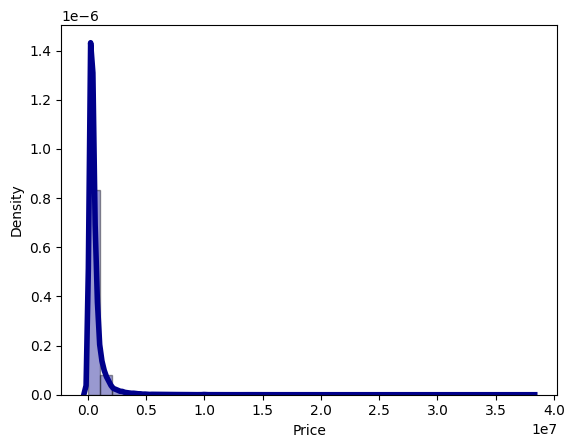

In [19]:
sns.distplot(American_Housing_Data['Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/tmp/ipykernel_33/551512437.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(American_Housing_Data['Median Household Income'], hist=True, kde=True,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Median Household Income', ylabel='Density'>

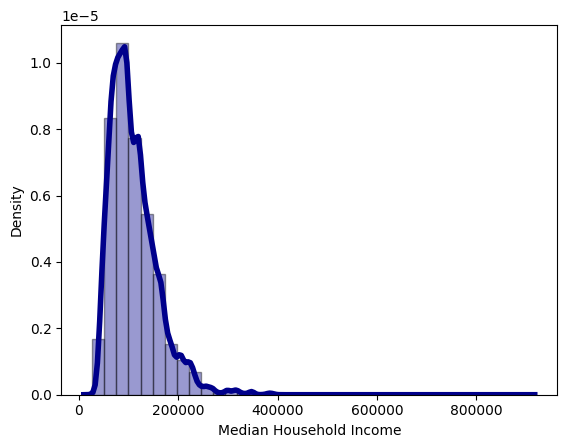

In [20]:
# Density Plot and Histogram of all arrival delays
sns.distplot(American_Housing_Data['Median Household Income'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

(array([3.9576e+04, 3.0000e+02, 6.1000e+01, 1.9000e+01, 7.0000e+00,
        8.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([1.800000e+03, 3.801620e+06, 7.601440e+06, 1.140126e+07,
        1.520108e+07, 1.900090e+07, 2.280072e+07, 2.660054e+07,
        3.040036e+07, 3.420018e+07, 3.800000e+07]),
 <BarContainer object of 10 artists>)

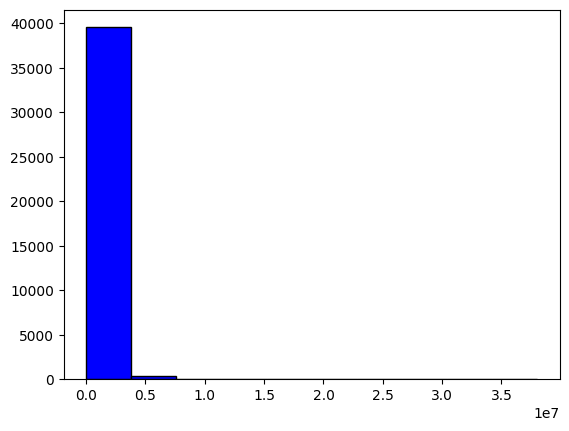

In [21]:
# matplotlib histogram
plt.hist(American_Housing_Data['Price'], color = 'blue', edgecolor = 'black',
         )

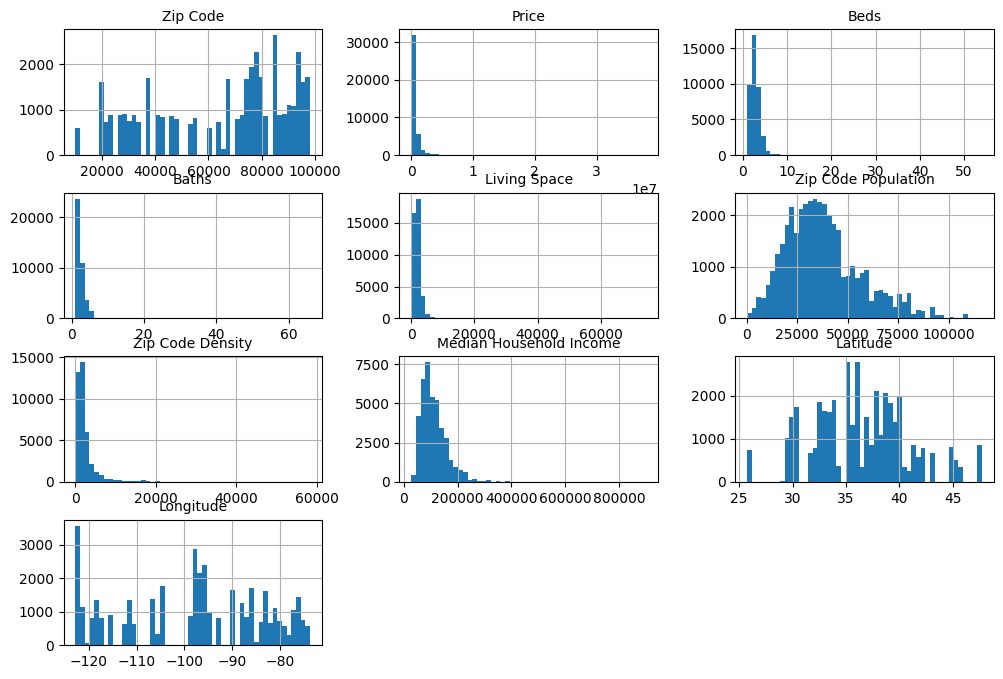

In [22]:
plt.rc('font', size=10)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# plot histograms of the numerical data
American_Housing_Data.hist(bins=50, figsize=(12, 8))
plt.show()

In [23]:
# splits into training and test sets
train_set, test_set = train_test_split(American_Housing_Data, test_size=0.2, random_state=42)

In [24]:
train_set.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
17735,70115.00,570000.00,2.00,2.00,1624.00,4520 LAUREL ST,New Orleans,Louisiana,34261.00,3439.20,Orleans,141812.00,29.92,-90.10
26889,80249.00,300000.00,2.00,1.00,829.00,18831 E 58TH AVE UNIT A,Denver,Colorado,36640.00,296.80,Denver,100812.00,39.85,-104.69
19825,74133.00,424900.00,4.00,3.00,3089.00,9226 S 73RD EAST AVE,Tulsa,Oklahoma,47158.00,1332.30,Tulsa,101960.00,36.04,-95.88
31634,89121.00,420000.00,4.00,3.00,1315.00,3670 RUTH DR,Las Vegas,Nevada,66455.00,2795.00,Clark,68433.00,36.12,-115.09
15297,64117.00,159900.00,2.00,1.00,1100.00,4444 N CYPRESS AVE,Kansas City,Missouri,14677.00,938.20,Clay,66848.00,39.17,-94.52


In [25]:
test_set.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
7602,33133.00,1590000.00,3.00,3.00,2180.00,3057 MARY ST,Miami,Florida,34434.00,3194.20,Miami-Dade,164713.00,25.73,-80.24
9287,38117.00,249900.00,3.00,2.00,1200.00,345 S WHITE STATION RD,Memphis,Tennessee,26584.00,1093.20,Shelby,136370.00,35.12,-89.91
37273,95133.00,305000.00,2.00,2.00,1536.00,505 GIANNOTTA WAY,San Jose,California,28902.00,3421.60,Santa Clara,173587.00,37.37,-121.86
33060,90807.00,875000.00,2.00,1.00,955.00,3565 ROSE AVE,Long Beach,California,32994.00,2881.60,Los Angeles,122666.00,33.83,-118.18
22916,77033.00,179000.00,3.00,2.00,1339.00,6039 WILLOW GLEN DR,Houston,Texas,28669.00,1939.00,Harris,54026.00,29.67,-95.34


In [26]:
American_Housing_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Zip Code,39979.00,64832.59,25614.99,10013.00,40215.00,74136.00,85730.00,98199.00
Price,39979.00,622782.64,947002.60,1800.00,265000.00,399900.00,674990.00,38000000.00
Beds,39979.00,3.17,1.31,1.00,3.00,3.00,4.00,54.00
Baths,39979.00,2.47,1.32,1.00,2.00,2.00,3.00,66.00
Living Space,39979.00,1901.51,1211.32,2.00,1200.00,1639.00,2265.00,74340.00
Zip Code Population,39979.00,37728.09,18671.21,39.00,24465.00,35049.00,46835.00,116469.00
Zip Code Density,39979.00,2379.53,2946.60,0.60,902.40,1588.70,2736.80,58289.60
Median Household Income,39979.00,110837.26,47309.06,27475.00,76640.00,100405.00,135075.00,900203.00
Latitude,39979.00,36.44,4.45,25.73,33.24,36.17,39.28,47.74
Longitude,39979.00,-98.08,15.06,-122.83,-111.64,-96.84,-85.66,-73.70


In [27]:
#using stratified sampling to ensure the test set is representative of various categories of income

American_Housing_Data["income_cat"] = pd.cut(American_Housing_Data["Median Household Income"],
                               bins=[0, 56783,100405, 135075, 170203, np.inf],
                               labels=[1, 2, 3, 4, 5])

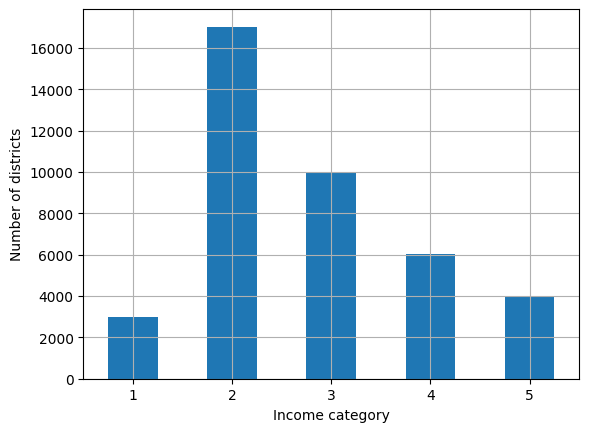

In [28]:
American_Housing_Data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [29]:
# stratified sampling train set test set split
strat_train_set, strat_test_set = train_test_split(
    American_Housing_Data, test_size=0.2, stratify=American_Housing_Data["income_cat"], random_state=42)

In [30]:
# check income category counts
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
2   0.43
3   0.25
4   0.15
5   0.10
1   0.07
Name: count, dtype: float64

In [31]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(American_Housing_Data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(American_Housing_Data),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,7.43,7.43,7.49,-0.04,0.81
2,42.59,42.60,42.31,0.02,-0.66
3,24.99,24.99,25.19,-0.00,0.80
4,15.10,15.10,14.71,-0.02,-2.59
5,9.89,9.89,10.31,-0.00,4.17


In [32]:
# drop the income_cat attribute, it is no longer needed
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [33]:
# copy training data to housing variable
American_Housing_Data = strat_train_set.copy()

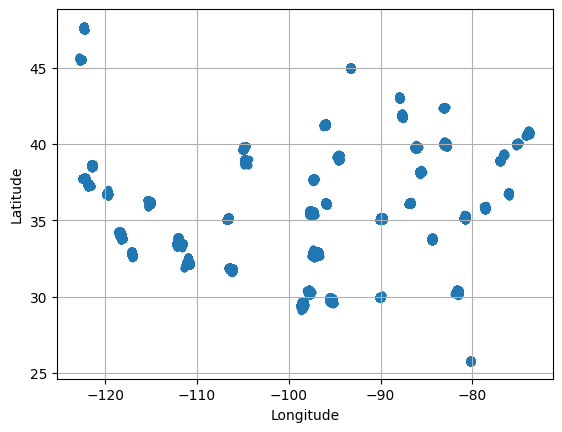

In [34]:
American_Housing_Data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True)
plt.show()

In [35]:
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")

In [36]:
continental_states = state_df.drop(state_df[state_df['NAME'] == 'Alaska'].index)

In [37]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'American Samoa'].index)

In [38]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'Guam'].index)

In [39]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'Puerto Rico'].index)

In [40]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'Hawaii'].index)

In [41]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'United States Virgin Islands'].index)

In [42]:
continental_states = continental_states.drop(continental_states[continental_states['NAME'] == 'Commonwealth of the Northern Mariana Islands'].index)

In [43]:
gdf = gpd.GeoDataFrame(
    American_Housing_Data, geometry=gpd.points_from_xy(American_Housing_Data.Longitude, American_Housing_Data.Latitude), crs="EPSG:4326"
)

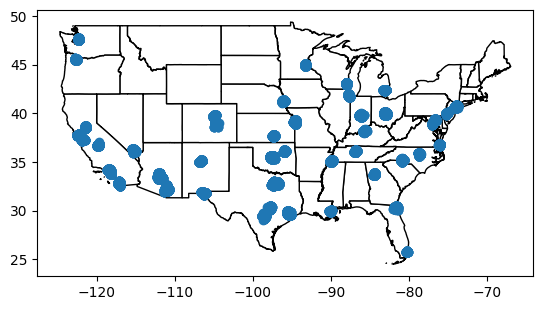

<Figure size 300x500 with 0 Axes>

In [44]:
ax = continental_states.plot(color="white", edgecolor="black")
gdf.plot(ax=ax)
plt.figure(figsize=(3,5))
plt.show()

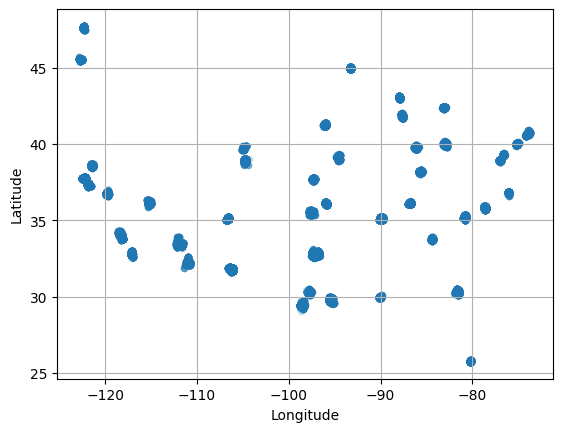

In [45]:
American_Housing_Data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

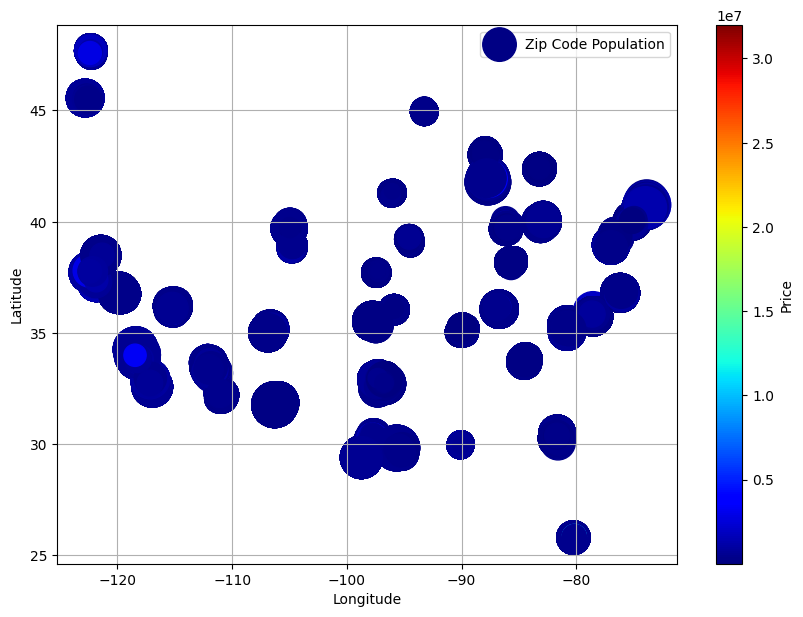

In [46]:
American_Housing_Data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=American_Housing_Data["Zip Code Population"] / 100, label="Zip Code Population",
             c="Price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

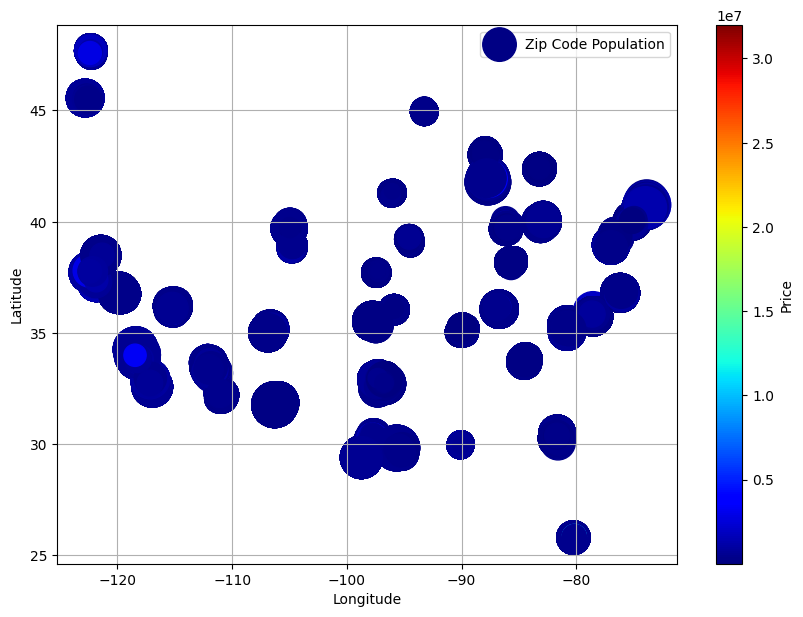

In [47]:
American_Housing_Data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=American_Housing_Data["Zip Code Population"] / 100, label="Zip Code Population",
             c="Price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

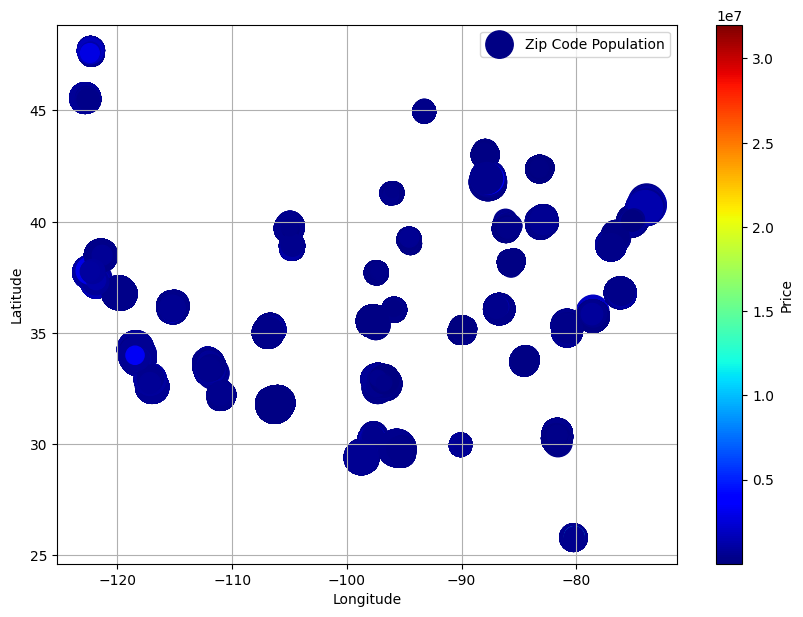

In [48]:
American_Housing_Data.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
             s=American_Housing_Data["Zip Code Population"] / 150, label="Zip Code Population",
             c="Price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [49]:
num_cols = ['Longitude','Latitude','Zip Code','Beds','Baths', 'Living Space','Zip Code Population','Zip Code Density',
            'Median Household Income','Price']

# compute correlations
corr_matrix = American_Housing_Data[num_cols].corr()

In [50]:
corr_matrix["Price"].sort_values(ascending=False)

Price                      1.00
Living Space               0.51
Baths                      0.45
Median Household Income    0.43
Beds                       0.27
Zip Code Density           0.16
Zip Code                   0.11
Zip Code Population       -0.04
Latitude                  -0.06
Longitude                 -0.17
Name: Price, dtype: float64

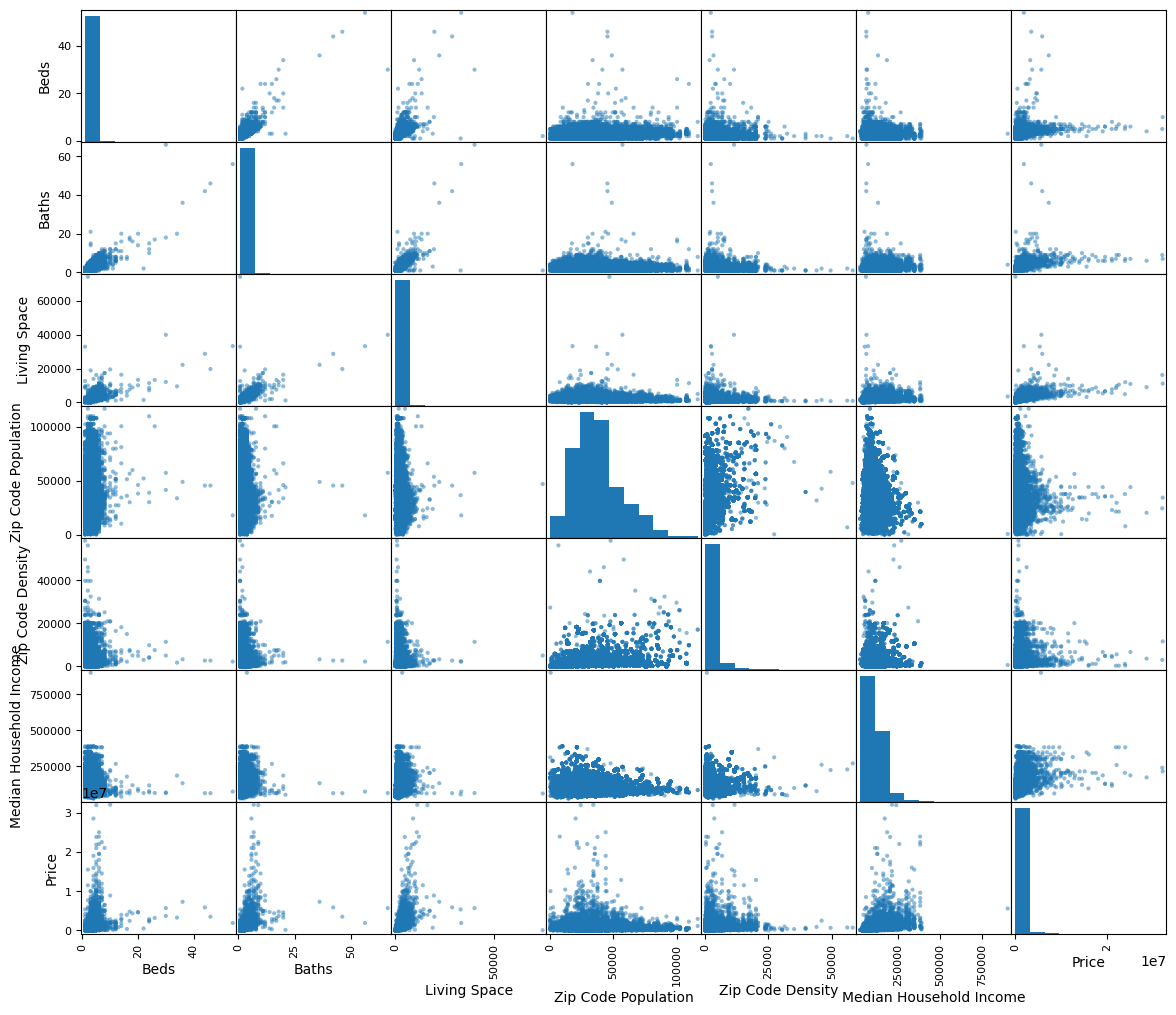

In [51]:
# plot every numerical attribute against every other numerical attribute ######
# reduce attributes so that it fits on screen
attributes = ["Beds",'Baths', 'Living Space','Zip Code Population','Zip Code Density',
            'Median Household Income','Price']

# plot scatterplots and histograms 
scatter_matrix(American_Housing_Data[attributes], figsize=(14, 12))
plt.show()

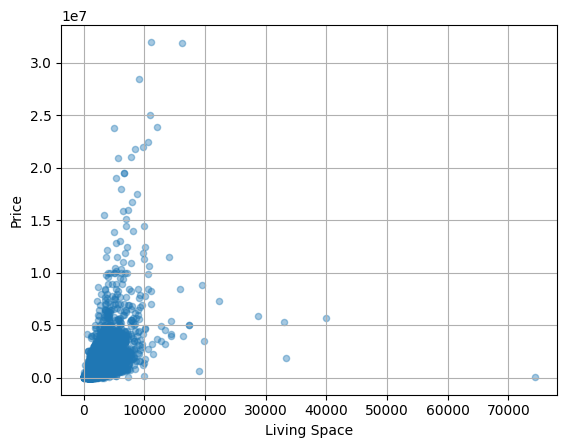

In [52]:
American_Housing_Data.plot(kind="scatter", x="Living Space", y="Price",
             alpha=0.4, grid=True)
plt.show()

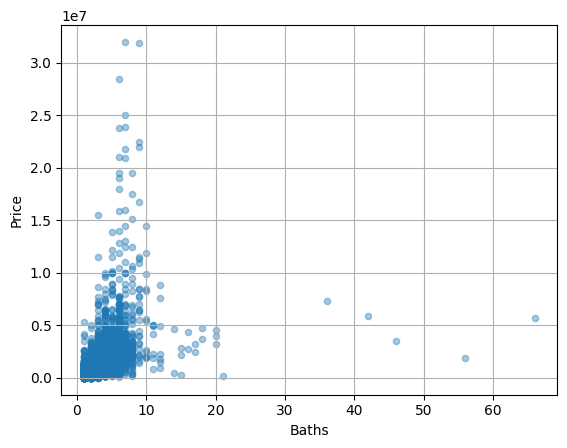

In [53]:
American_Housing_Data.plot(kind="scatter", x="Baths", y="Price",
             alpha=0.4, grid=True)
plt.show()

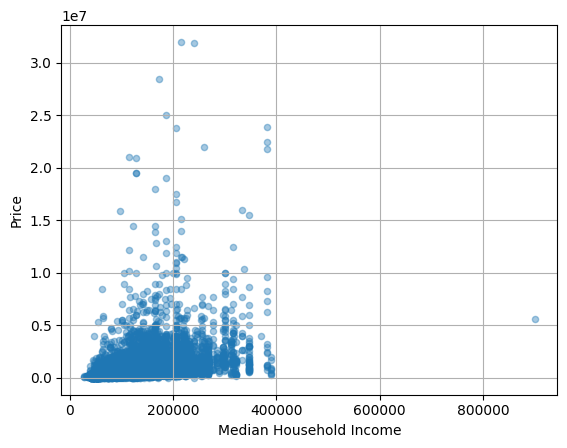

In [54]:
American_Housing_Data.plot(kind="scatter", x="Median Household Income", y="Price",
             alpha=0.4, grid=True)
plt.show()

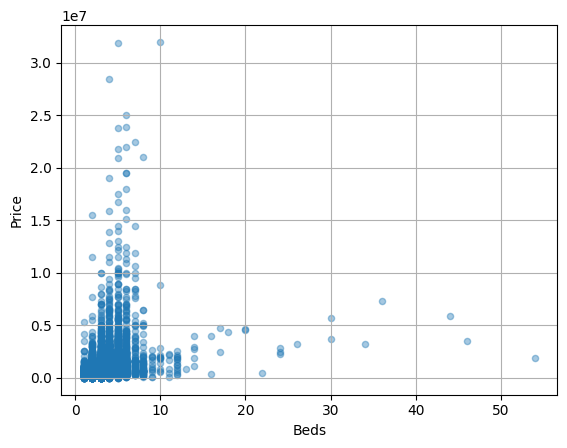

In [55]:
American_Housing_Data.plot(kind="scatter", x="Beds", y="Price",
             alpha=0.4, grid=True)
plt.show()

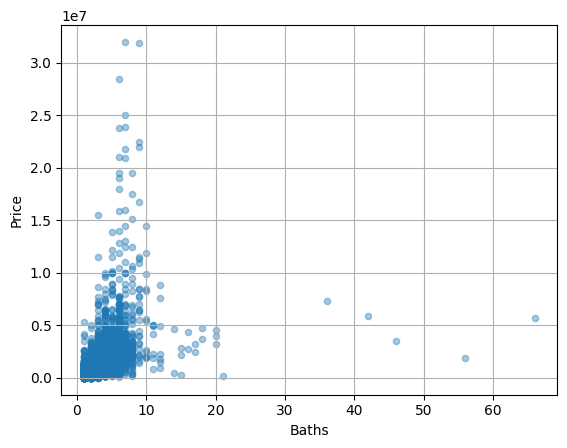

In [56]:
American_Housing_Data.plot(kind="scatter", x="Baths", y="Price",
             alpha=0.4, grid=True)
plt.show()

In [57]:
American_Housing_Data.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
12964,48235.00,159950.00,3.00,2.00,1482.00,18647 APPOLINE ST,Detroit,Michigan,45558.00,2816.60,Wayne,53050.00,42.43,-83.19
37681,95822.00,299000.00,3.00,1.00,809.00,1454 38TH AVE,Sacramento,California,46375.00,2132.20,Sacramento,93198.00,38.51,-121.50
37324,95135.00,899000.00,3.00,2.00,1582.00,8613 VINEYARD RIDGE PL,San Jose,California,22010.00,65.70,Santa Clara,244898.00,37.22,-121.56
12570,48221.00,139990.00,3.00,1.00,1375.00,16817 SANTA ROSA DR,Detroit,Michigan,41203.00,3062.60,Wayne,73212.00,42.43,-83.15
11998,46236.00,699000.00,4.00,5.00,5348.00,11361 OLD STONE DR,Indianapolis,Indiana,28163.00,1036.00,Marion,137018.00,39.89,-85.97


In [58]:
# reverting back to original training set
American_Housing_Data = strat_train_set.drop("Price", axis=1)


housing_labels = strat_train_set["Price"].copy()

In [59]:
median = American_Housing_Data["Beds"].median()  
American_Housing_Data["Beds"].fillna(median, inplace=True)

/tmp/ipykernel_33/2847596999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  American_Housing_Data["Beds"].fillna(median, inplace=True)


In [60]:
# create a Series of True/False values for null values in a column
null_rows_idx = American_Housing_Data.isnull().any(axis=1)

# selecting only the rows with null values
American_Housing_Data.loc[null_rows_idx].head()

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude


In [61]:
housing_imputing_median = American_Housing_Data.copy()

median_bedrooms = American_Housing_Data["Beds"].median()
median_bedrooms

3.0

In [62]:
housing_imputing_median["Beds"].fillna(median_bedrooms, inplace=True)  # option 3

housing_imputing_median.loc[null_rows_idx].head()

/tmp/ipykernel_33/4197885398.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_imputing_median["Beds"].fillna(median_bedrooms, inplace=True)  # option 3


,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude


In [63]:
imputer = SimpleImputer(strategy="median")

In [64]:
housing_num = American_Housing_Data.select_dtypes(include=[np.number])

In [65]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [66]:
imputer.statistics_

array([ 7.413600e+04,  3.000000e+00,  2.000000e+00,  1.638000e+03,
        3.472300e+04,  1.587200e+03,  1.004050e+05,  3.616748e+01,
       -9.683943e+01])

In [67]:
housing_num.median()

Zip Code                   74136.00
Beds                           3.00
Baths                          2.00
Living Space                1638.00
Zip Code Population        34723.00
Zip Code Density            1587.20
Median Household Income   100405.00
Latitude                      36.17
Longitude                    -96.84
dtype: float64

In [68]:
X = imputer.transform(housing_num)

In [69]:
X

array([[ 4.8235000e+04,  3.0000000e+00,  2.0000000e+00, ...,
         5.3050000e+04,  4.2427020e+01, -8.3194700e+01],
       [ 9.5822000e+04,  3.0000000e+00,  1.0000000e+00, ...,
         9.3198000e+04,  3.8512730e+01, -1.2149556e+02],
       [ 9.5135000e+04,  3.0000000e+00,  2.0000000e+00, ...,
         2.4489800e+05,  3.7222850e+01, -1.2155913e+02],
       ...,
       [ 9.0291000e+04,  4.0000000e+00,  4.0000000e+00, ...,
         1.8555100e+05,  3.3994470e+01, -1.1846315e+02],
       [ 7.5215000e+04,  3.0000000e+00,  3.0000000e+00, ...,
         6.4568000e+04,  3.2752590e+01, -9.6760750e+01],
       [ 3.2208000e+04,  4.0000000e+00,  2.0000000e+00, ...,
         5.4640000e+04,  3.0393510e+01, -8.1682450e+01]])

In [70]:
imputer.strategy

'median'

In [71]:
imputer.feature_names_in_

array(['Zip Code', 'Beds', 'Baths', 'Living Space', 'Zip Code Population',
       'Zip Code Density', 'Median Household Income', 'Latitude',
       'Longitude'], dtype=object)

In [72]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, # or use above imputer.feature_names_in_
                          index=housing_num.index)

In [73]:
housing_tr.loc[null_rows_idx].head()

,Zip Code,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income,Latitude,Longitude


#model-training-and-evaluation

In [74]:
null_rows_idx = American_Housing_Data.isnull().any(axis=1)

American_Housing_Data.loc[null_rows_idx].head()

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude


In [75]:
housing_cat = American_Housing_Data[["City","State","County"]]
housing_cat.head()

,City,State,County
12964,Detroit,Michigan,Wayne
37681,Sacramento,California,Sacramento
37324,San Jose,California,Santa Clara
12570,Detroit,Michigan,Wayne
11998,Indianapolis,Indiana,Marion


In [76]:
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [77]:
housing_cat_encoded[:5]

array([[ 48.,  12.,  83.],
       [181.,   1.,  68.],
       [187.,   1.,  71.],
       [ 48.,  12.,  83.],
       [ 97.,   7.,  50.]])

In [78]:
# view all categories
ordinal_encoder.categories_

[array(['Albuquerque', 'Aledo', 'Apache Junction', 'Arlington', 'Arverne',
        'Astoria', 'Atascosa', 'Atlanta', 'Atlantic Beach', 'Austin',
        'Baltimore', 'Bayside', 'Bellerose', 'Bellevue', 'Bennington',
        'Berkeley', 'Beverly Hills', 'Blacklick', 'Boerne', 'Bronx',
        'Brooklyn', 'Burbank', 'Burleson', 'Calhan', 'Cambria Heights',
        'Campbell', 'Canal Winchester', 'Canoga Park', 'Catonsville',
        'Cave Creek', 'Charlotte', 'Chatsworth', 'Chesapeake', 'Chicago',
        'Choctaw', 'Clint', 'College Point', 'Colorado Springs',
        'Columbus', 'Converse', 'Cordova', 'Corona', 'Crowley',
        'Culver City', 'Curtis Bay', 'Dallas', 'Del Mar', 'Denver',
        'Detroit', 'Dublin', 'Dundalk', 'Durham', 'East Elmhurst',
        'Edmond', 'El Paso', 'Elkhorn', 'Elmhurst', 'Elmwood Park',
        'Emeryville', 'Encino', 'Essex', 'Euless', 'Fairdale',
        'Far Rockaway', 'Fisherville', 'Floral Park', 'Flushing',
        'Forest Hills', 'Fort Worth', 

In [79]:
cat_encoder = OneHotEncoder(drop='first')

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [80]:
# this creates a sparse matrix
housing_cat_1hot

<31983x345 sparse matrix of type '<class 'numpy.float64'>'
	with 93127 stored elements in Compressed Sparse Row format>

In [81]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
cat_encoder = OneHotEncoder(drop='first', sparse_output=False) 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
# checking categories
cat_encoder.categories_

[array(['Albuquerque', 'Aledo', 'Apache Junction', 'Arlington', 'Arverne',
        'Astoria', 'Atascosa', 'Atlanta', 'Atlantic Beach', 'Austin',
        'Baltimore', 'Bayside', 'Bellerose', 'Bellevue', 'Bennington',
        'Berkeley', 'Beverly Hills', 'Blacklick', 'Boerne', 'Bronx',
        'Brooklyn', 'Burbank', 'Burleson', 'Calhan', 'Cambria Heights',
        'Campbell', 'Canal Winchester', 'Canoga Park', 'Catonsville',
        'Cave Creek', 'Charlotte', 'Chatsworth', 'Chesapeake', 'Chicago',
        'Choctaw', 'Clint', 'College Point', 'Colorado Springs',
        'Columbus', 'Converse', 'Cordova', 'Corona', 'Crowley',
        'Culver City', 'Curtis Bay', 'Dallas', 'Del Mar', 'Denver',
        'Detroit', 'Dublin', 'Dundalk', 'Durham', 'East Elmhurst',
        'Edmond', 'El Paso', 'Elkhorn', 'Elmhurst', 'Elmwood Park',
        'Emeryville', 'Encino', 'Essex', 'Euless', 'Fairdale',
        'Far Rockaway', 'Fisherville', 'Floral Park', 'Flushing',
        'Forest Hills', 'Fort Worth', 

In [84]:
cat_encoder.feature_names_in_

array(['City', 'State', 'County'], dtype=object)

In [85]:
cat_encoder.get_feature_names_out()

array(['City_Aledo', 'City_Apache Junction', 'City_Arlington',
       'City_Arverne', 'City_Astoria', 'City_Atascosa', 'City_Atlanta',
       'City_Atlantic Beach', 'City_Austin', 'City_Baltimore',
       'City_Bayside', 'City_Bellerose', 'City_Bellevue',
       'City_Bennington', 'City_Berkeley', 'City_Beverly Hills',
       'City_Blacklick', 'City_Boerne', 'City_Bronx', 'City_Brooklyn',
       'City_Burbank', 'City_Burleson', 'City_Calhan',
       'City_Cambria Heights', 'City_Campbell', 'City_Canal Winchester',
       'City_Canoga Park', 'City_Catonsville', 'City_Cave Creek',
       'City_Charlotte', 'City_Chatsworth', 'City_Chesapeake',
       'City_Chicago', 'City_Choctaw', 'City_Clint', 'City_College Point',
       'City_Colorado Springs', 'City_Columbus', 'City_Converse',
       'City_Cordova', 'City_Corona', 'City_Crowley', 'City_Culver City',
       'City_Curtis Bay', 'City_Dallas', 'City_Del Mar', 'City_Denver',
       'City_Detroit', 'City_Dublin', 'City_Dundalk', 'City_Durh

In [86]:
df_output = pd.DataFrame(housing_cat_1hot,
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cat.index)

df_output

,City_Aledo,City_Apache Junction,City_Arlington,City_Arverne,City_Astoria,City_Atascosa,City_Atlanta,City_Atlantic Beach,City_Austin,City_Baltimore,...,County_Tarrant,County_Travis,County_Tulsa,County_Union,County_Virginia Beach,County_Wake,County_Washington,County_Wayne,County_Williamson,County_Wyandotte
12964,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
37681,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37324,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12570,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
11998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23483,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
22389,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
32704,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20404,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [87]:
# create a sample "test" set
df_test = pd.DataFrame({'City': ['Albuquerque', 'Aledo', 'Apache Junction', 'Arlington', 'Arverne',
        'Astoria', 'Atascosa', 'Atlanta', 'Atlantic Beach', 'Austin',
        'Baltimore', 'Bayside', 'Bellerose', 'Bellevue'],
        'State': ['Arizona', 'California', 'Colorado', 'District of Columbia',
        'Florida', 'Georgia', 'Illinois', 'Indiana', 'Kansas', 'Kentucky',
        'Louisiana', 'Maryland', 'Michigan', 'Minnesota'],
        'County': ['Adams', 'Alameda', 'Anne Arundel', 'Anoka', 'Atascosa',
        'Baltimore', 'Bernalillo', 'Bexar', 'Bronx', 'Bullitt', 'Canadian',
        'Chesapeake', 'Clark', 'Clay']
        })
pd.get_dummies(df_test, dtype=np.uint8)

,City_Albuquerque,City_Aledo,City_Apache Junction,City_Arlington,City_Arverne,City_Astoria,City_Atascosa,City_Atlanta,City_Atlantic Beach,City_Austin,...,County_Atascosa,County_Baltimore,County_Bernalillo,County_Bexar,County_Bronx,County_Bullitt,County_Canadian,County_Chesapeake,County_Clark,County_Clay
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [88]:
cat_encoder.transform(df_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
# create a new test set with an "unknown" category
df_test_unknown = pd.DataFrame({'City': ['Wake Forest', 'Washington', 'Webster', 'West Hills',
        'West Hollywood', 'Westerville', 'Westfield', 'Whitestone',
        'Wichita', 'Wilmington', 'Winnetka', 'Woodland Hills', 'Woodside',
        'Yukon'],
        'State': ['Nebraska', 'Nevada', 'New Mexico', 'New York', 'North Carolina',
        'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas',
        'Virginia', 'Washington', 'Wisconsin'],
        'County': ['Sarpy', 'Sedgwick', 'Shelby', 'St. Johns', 'Tarrant', 'Travis', 'Tulsa',
        'Union', 'Virginia Beach', 'Wake', 'Washington', 'Wayne',
        'Williamson', 'Wyandotte']
        })
pd.get_dummies(df_test_unknown, dtype=np.uint8)

,City_Wake Forest,City_Washington,City_Webster,City_West Hills,City_West Hollywood,City_Westerville,City_Westfield,City_Whitestone,City_Wichita,City_Wilmington,...,County_Tarrant,County_Travis,County_Tulsa,County_Union,County_Virginia Beach,County_Wake,County_Washington,County_Wayne,County_Williamson,County_Wyandotte
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [90]:
### run code without and with ignoring the unknown category 

cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [91]:
min_max_scaler = MinMaxScaler()

# call fit_transform
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

# look at first row of array
housing_num_min_max_scaled[0]

array([0.43342481, 0.03773585, 0.01538462, 0.01990906, 0.39054241,
       0.048311  , 0.02930466, 0.75853082, 0.80680509])

In [92]:
# instantiate scaler
std_scaler = StandardScaler()

# call fit_transform
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

# look at first row of array
housing_num_std_scaled[0]

array([-0.64825179, -0.12995251, -0.35169035, -0.34292995,  0.4247724 ,
        0.15318192, -1.22225899,  1.3447491 ,  0.98720835])

In [93]:
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # to_frame() converts from Series to DataFrame

In [94]:
# instantiate LinearRegression() class
model1 = LinearRegression()

# fit median income and scaled labels
model1.fit(American_Housing_Data[["Median Household Income"]], scaled_labels)

# creating some "pretend" new data
some_new_data = American_Housing_Data[["Median Household Income"]].iloc[:5]

# making a prediction using that "pretend" new data
scaled_predictions = model1.predict(some_new_data)
scaled_predictions

array([[-0.52113518],
       [-0.15912496],
       [ 1.20873768],
       [-0.33933658],
       [ 0.23599528]])

In [95]:
# reverting scaled_predictions back to original scale
predictions1 = target_scaler.inverse_transform(scaled_predictions)
predictions1

array([[ 135726.82037202],
       [ 474556.31222488],
       [1754830.14688859],
       [ 305884.24327571],
       [ 844375.68885615]])

In [96]:
# create model
model2 = TransformedTargetRegressor(LinearRegression(),
                                    transformer=StandardScaler())

# fit model
model2.fit(American_Housing_Data[["Median Household Income"]], housing_labels)

# make predictions
predictions2 = model2.predict(some_new_data)
predictions2

array([ 135726.82037202,  474556.31222488, 1754830.14688859,
        305884.24327571,  844375.68885615])

In [97]:
Beds_ix, Baths_ix, living_space_ix, population_ix = 1, 2, 3, 7

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None): # pipelines require the fit() method to have two arguments X and y; which is why we have y=None
        return self  # nothing else to do
    
    def transform(self, X):
        rooms_per_household = X[:, Beds_ix] / X[:, living_space_ix]
        population_per_household = X[:, population_ix] / X[:, living_space_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, Baths_ix] / X[:, Beds_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [98]:
# instantiate the class
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

# transform the housing values
housing_extra_attribs = attr_adder.transform(American_Housing_Data.values)

In [99]:
# just reviewing what the housing.values code will get you
American_Housing_Data.values[0]

array([48235.0, 3.0, 2.0, 1482.0, '18647 APPOLINE ST', 'Detroit',
       'Michigan', 45558.0, 2816.6, 'Wayne', 53050.0, 42.42702, -83.1947],
      dtype=object)

In [100]:
# show that the attributes were added
housing_extra_attribs[0]

array([48235.0, 3.0, 2.0, 1482.0, '18647 APPOLINE ST', 'Detroit',
       'Michigan', 45558.0, 2816.6, 'Wayne', 53050.0, 42.42702, -83.1947,
       0.0020242914979757085, 30.74089068825911], dtype=object)

In [101]:
#viewing housing_extra_attribs with column names
housing_extra_attribs_df = pd.DataFrame(
    housing_extra_attribs,
    columns=list(American_Housing_Data.columns)+["rooms_per_household", "population_per_household"],
    index=American_Housing_Data.index)

housing_extra_attribs_df.head(1)

,Zip Code,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude,rooms_per_household,population_per_household
12964,48235.00,3.00,2.00,1482.00,18647 APPOLINE ST,Detroit,Michigan,45558.00,2816.60,Wayne,53050.00,42.43,-83.19,0.00,30.74


In [102]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #takes list of name/estimator pairs
        ('attribs_adder', CombinedAttributesAdder()), #all but the last transformer must be transformers (have fit_transform method)
        ('std_scaler', StandardScaler()), #exposes the same methods as the final transformer (fit_transform) - could be predictor
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [103]:
housing_num_tr[0]

array([-0.64825179, -0.12995251, -0.35169035, -0.34292995,  0.4247724 ,
        0.15318192, -1.22225899,  1.3447491 ,  0.98720835,  0.00597456,
        0.03217685, -0.46105396])

In [104]:
# using make_pipeline (without naming the transformers)
num_pipeline2 = make_pipeline(
    SimpleImputer(strategy="median"),
    CombinedAttributesAdder(),
    StandardScaler())

# calling fit_transform and outputting first row in array
housing_num_tr2 = num_pipeline2.fit_transform(housing_num)
housing_num_tr2[0]

array([-0.64825179, -0.12995251, -0.35169035, -0.34292995,  0.4247724 ,
        0.15318192, -1.22225899,  1.3447491 ,  0.98720835,  0.00597456,
        0.03217685, -0.46105396])

In [105]:
American_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31983 entries, 12964 to 6494
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 31983 non-null  float64
 1   Beds                     31983 non-null  float64
 2   Baths                    31983 non-null  float64
 3   Living Space             31983 non-null  float64
 4   Address                  31983 non-null  object 
 5   City                     31983 non-null  object 
 6   State                    31983 non-null  object 
 7   Zip Code Population      31983 non-null  float64
 8   Zip Code Density         31983 non-null  float64
 9   County                   31983 non-null  object 
 10  Median Household Income  31983 non-null  float64
 11  Latitude                 31983 non-null  float64
 12  Longitude                31983 non-null  float64
dtypes: float64(9), object(4)
memory usage: 3.4+ MB


In [106]:
# obtain list of column names
num_attribs = list(housing_num)
cat_attribs = ["City","State","County"]

# create full pipeline
preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

housing_prepared = preprocessing.fit_transform(American_Housing_Data)

In [107]:
housing_prepared[0]

<1x357 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [108]:
# preprocessing the data 
lin_reg = make_pipeline(preprocessing, LinearRegression())

# I am using unprocessed "housing_prices" and not "housing_prepared"
lin_reg.fit(American_Housing_Data, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Zip Code', 'Beds', 'Baths',
                                                   'Living Space',
                                                   'Zip Code Population',
                                                   'Zip Code Density',
                                                   'Median Household Income',
                                                   'Latitude', 'Longitude']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'State',
                                                   'County'])])),
                ('linearregression', LinearRegression())])

In [109]:
housing_predictions = lin_reg.predict(American_Housing_Data)

housing_predictions[:5].round(-2)  

array([ 168800.,  198500., 1376100.,  143500., 1708900.])

In [110]:
#comparing with actual values
housing_labels.iloc[:5].values

array([159950., 299000., 899000., 139990., 699000.])

In [111]:
#here we can see the rmse for the linear regression model. 
#I will use a more complex model to improve the rmse score

lin_rmse = mean_squared_error(housing_labels, housing_predictions, #notice order of labels then predictions (common error from students)
                              squared=False) #need to include this parameter or you could take the square root of mse
lin_rmse

643645.6696302827

In [112]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(American_Housing_Data, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Zip Code', 'Beds', 'Baths',
                                                   'Living Space',
                                                   'Zip Code Population',
                                                   'Zip Code Density',
                                                   'Median Household Income',
                                                   'Latitude', 'Longitude']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['City', 'State',
                                                   'County'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [113]:
#the rmse score is much better with DecisionTreeRegressor, but may indicate overfitting
housing_predictions = tree_reg.predict(American_Housing_Data)

tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

14391.33336083662

In [114]:
housing_predictions = tree_reg.predict(American_Housing_Data)

housing_predictions[:5].round(-2)  

array([160000., 299000., 899000., 140000., 699000.])

In [115]:
#comparing with actual values
housing_labels.iloc[:5].values

array([159950., 299000., 899000., 139990., 699000.])

In [116]:
pickle.dump(tree_reg, open('final_model.pkl','wb'))

In [117]:
# Loading model to compare the results
final_model = pickle.load(open('final_model.pkl','rb'))

In [118]:
final_model_predictions = final_model.predict(American_Housing_Data)

final_model_predictions[:5].round(-2)  

array([160000., 299000., 899000., 140000., 699000.])

In [119]:
housing_labels.iloc[:5].values

array([159950., 299000., 899000., 139990., 699000.])

In [120]:
final_model_rmse = mean_squared_error(housing_labels, final_model_predictions,
                              squared=False)
final_model_rmse

14391.33336083662

In [121]:
from sklearn.metrics import r2_score

# Calculate R-squared
final_model_r2 = r2_score(housing_labels, final_model_predictions)

# Print R-squared
final_model_r2

0.9997635815840907